# 통계분석

In [20]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
from pulp import LpMaximize, LpProblem, LpVariable
from statsmodels.sandbox.stats.runs import runstest_1samp

1.&nbsp; 회사 제품의 금속 재질 함유량의 분산이 1.3이 넘으면 불량이라고 판단한다. 회사에서는 품질경영팀으로부터 제조사별로 금속 함유량이 차이가 난다고 제보를 받았다. 해당 금속 함유량 데이터에 대한 검정을 수행하시오(유의확률: 0.05). <br>
(1) 귀무가설과 대립가설을 작성하시오.

귀무가설: 제품들의 금속 재질 함유량의 분산은 1.3보다 같거나 작다. <br>
대립가설: 제품들의 금속 재질 함유량의 분산은 1.3보다 크다.

(2) 가설을 양측 검정하시오.

양측 검정을 하게 되면 귀무가설이 분산은 1.3과 같다가 됨. 이러면 분산이 1.3 이하일 때도 귀무가설을 기각함. 따라서 우측 검정 진행.

In [2]:
data_path = '/hdd/data/adp_data/metalicity'
df = pd.read_csv(data_path)
print(df.shape)
df

(150, 1)


,metalicity
0,42.731551
1,46.429668
2,45.754023
3,45.808060
4,44.072529
...,...
145,45.915727
146,45.277868
147,45.082157
148,44.297235


In [3]:
print(stats.shapiro(df['metalicity']))

ShapiroResult(statistic=np.float64(0.9822468688948388), pvalue=np.float64(0.050021190861047865))


In [4]:
var_h0 = 1.3
var_metalicity = stats.tvar(df['metalicity'])

f_stat = var_metalicity / var_h0

dof = len(df['metalicity']) - 1

p_value = 1 - stats.f.cdf(f_stat, dof, dof)
print(p_value)

0.9996443322201601


양측 검정

In [5]:
test = np.random.normal(45.32, 1.3**0.5, 150)

stats.levene(df['metalicity'], test)

LeveneResult(statistic=np.float64(2.373311302184707), pvalue=np.float64(0.12448616616942139))

In [6]:
print(var_metalicity)

0.7432009850287777


In [7]:
var_h0 = 1.3
var_metalicity = stats.tvar(df['metalicity'])

f_stat = var_metalicity / var_h0

dof = len(df['metalicity']) - 1

p_value = stats.f.cdf(f_stat, dof, dof)
print(p_value)

0.0003556677798399121


제품들의 금속 제질 함유량의 분산은 1.3보다 작다고 할 수 있다.

2.&nbsp; 제품 200개의 Lot별 불량 제품 수량 데이터에 대해 p관리도를 구하고 시각화하시오. <br>
(1) p관리도에 따라 관리중심선(Center Line), 관리 상한선, 하한선을 구하시오.

p관리도 구하는 방법
1. n: lot별 생산수량
2. p: lot별 불량수량 %
3. CL(관리중심선): 전체 불량수량 / 전체 생산수량
4. 관리 상하한선: $p \pm 3\sqrt{\frac{p(1-p)}{n}}$

In [9]:
data2_path = '/hdd/data/adp_data/lot_quality.csv'
df2 = pd.read_csv(data2_path, index_col = 'lot')
df2

,생산수량,불량수량
lot,,
1,587,19
2,588,15
3,455,19
4,666,12
5,750,15
...,...,...
196,631,18
197,565,21
198,570,12


In [10]:
# 2. p 구하기
df2['p'] = df2['불량수량'] / df2['생산수량']

# 4. 관리 상하한선 구하기
df2['UCL'] = df2['p'] + (3 * (df2['p'] * (1 - df2['p']) / df2['생산수량']) ** 0.5)
df2['LCL'] = df2['p'] - (3 * (df2['p'] * (1 - df2['p']) / df2['생산수량']) ** 0.5)

# 3. CL 구하기
CL = df2['불량수량'].sum() / df2['생산수량'].sum()
print('관리중심선: ', CL)
df2

관리중심선:  0.029024320840935338


,생산수량,불량수량,p,UCL,LCL
lot,,,,,
1,587,19,0.032368,0.054282,0.010454
2,588,15,0.025510,0.045017,0.006004
3,455,19,0.041758,0.069892,0.013625
4,666,12,0.018018,0.033481,0.002555
5,750,15,0.020000,0.035336,0.004664
...,...,...,...,...,...
196,631,18,0.028526,0.048407,0.008645
197,565,21,0.037168,0.061044,0.013292
198,570,12,0.021053,0.039092,0.003013


(2) 관리도를 시각화하시오.

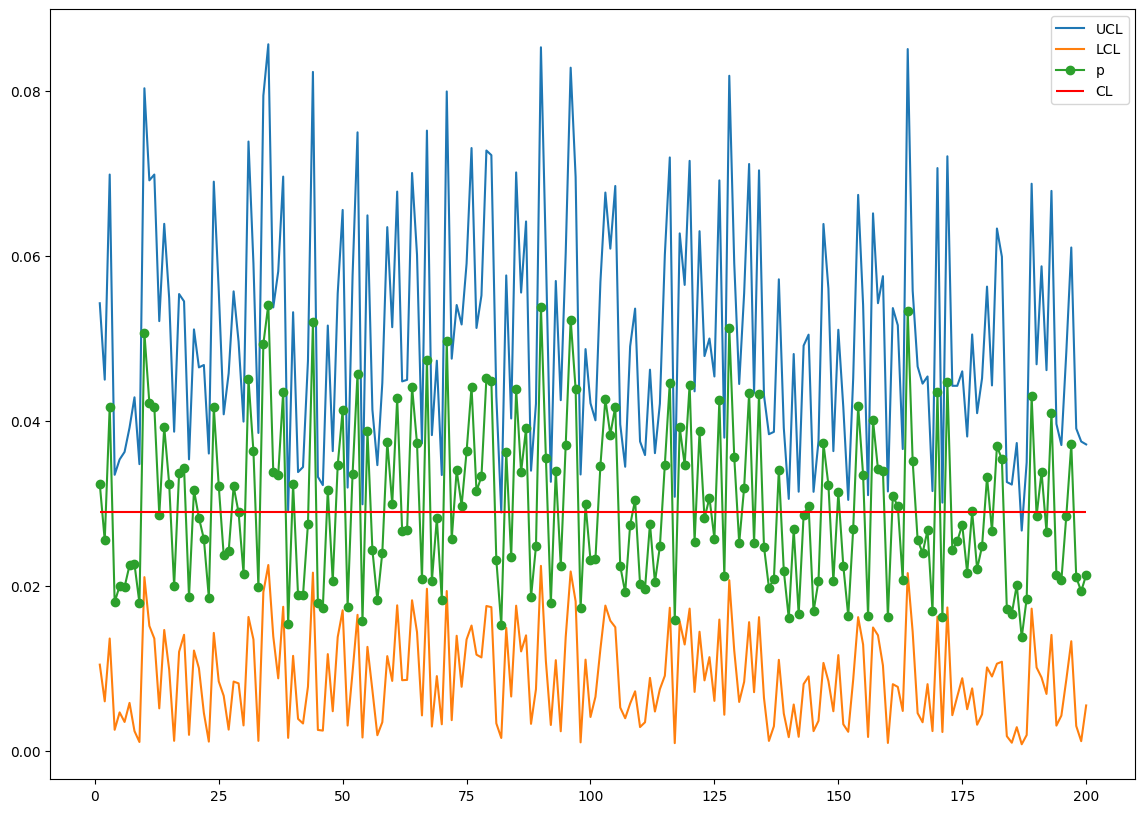

In [15]:
plt.figure(figsize = (14, 10))
plt.plot(df2['UCL'])
plt.plot(df2['LCL'])
plt.plot(df2['p'], marker = 'o')
plt.hlines(CL, 1, 200, colors = 'red')
plt.legend(['UCL', 'LCL', 'p', 'CL'])
plt.show()

3.&nbsp; 제품 1, 2를 만드는데 재료 a, b, c가 일부 사용되며, 제품 1과 2를 만들 때 12만원과 18만원을 벌 수 있다. 재료는 한정적으로 주어지는데, 이때 최대 수익을 낼 수 있을 때의 제품 1과 제품 2의 개수를 구하라.

In [17]:
model = LpProblem(name = 'maximize_profit', sense = LpMaximize)

x1 = LpVariable(name = 'Product1', lowBound = 0, cat = 'Integer')
x2 = LpVariable(name = 'Product2', lowBound = 0, cat = 'Integer')

model += 12 * x1 + 18 * x2, 'Total_Profit'

model += 20 * x1 + 40 * x2 <= 1300, 'Material_A_Limit'
model += 20 * x1 + 30 * x2 <= 1000, 'Material_B_Limit'
model += 20 * x1 + 30 * x2 <= 1200, 'Material_C_Limit'

model.solve()

print(f'최적의 제품1 개수: {x1.varValue}')
print(f'최적의 제품2 개수: {x2.varValue}')
print(f'최대 수익: {model.objective.value()}만원')

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/ubuntu/work_space/adp_hands_on/.adp_hands_on/lib/python3.10/site-packages/pulp/apis/../solverdir/cbc/linux/i64/cbc /tmp/06a88aa05f4b431dbf580c79a4e35bf7-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/06a88aa05f4b431dbf580c79a4e35bf7-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 21 RHS
At line 25 BOUNDS
At line 28 ENDATA
Problem MODEL has 3 rows, 2 columns and 6 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 600 - 0.00 seconds
Cgl0004I processed model has 2 rows, 2 columns (2 integer (0 of which binary)) and 4 elements
Cutoff increment increased from 1e-05 to 5.9999
Cbc0012I Integer solution of -600 found by DiveCoefficient after 0 iterations and 0 nodes (0.00 seconds)
Cbc0001I Search completed - best objective -600, took 0 iterations a

4.&nbsp; 상품 a와 b가 있을 때 다음과 같은 구매 패턴이 있다고 한다. <br>
(1) 구매 패턴으로 볼 때 두 상품이 연관이 있는지 가설을 세우고 검정하시오.

귀무가설: 연속적인 관측값이 임의적이다. 즉, 연관성이 없다. <br>
대립가설: 연속적인 관측값이 임의적이 아니다. 즉, 연관성이 있다.

In [19]:
data = ['a', 'a', 'b', 'b', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'a', 'a', 'b', 'b', 'a', 'b', 'b']
test_df = pd.DataFrame(data, columns = ['product'])
test_df.loc[test_df['product'] == 'a', 'product'] = 1
test_df.loc[test_df['product'] == 'b', 'product'] = 0
test_df

,product
0,1
1,1
2,0
3,0
4,1
5,1
6,1
7,1
8,0
9,0


In [21]:
runstest_1samp(test_df['product'])

(np.float64(-1.1144881152070183), np.float64(0.26506984027306035))

(2) 가설을 채택하시오.

귀무가설 채택. 상품 a와 b의 구매에는 연관이 없음.